<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [31]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [32]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [33]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [34]:
#your code goes here
soup = BeautifulSoup(data, "lxml")

Scrape the `Language name` and `annual average salary`.


In [35]:
#your code goes here
prog_lang = pd.DataFrame(columns = ['No.', 'Language', 'Created By', 'Average Annual Salary', 'Learning Difficulty'])

for tags in soup.find('tbody').find_all('tr'):
    cols = tags.find_all('td')
    data = {
        'No.': cols[0].text,
        'Language': cols[1].text,
        'Created By': cols[2].text,
        'Average Annual Salary': cols[3].text,
        'Learning Difficulty': cols[4].text
    }
    
    index = len(prog_lang)
    prog_lang.loc[index] = data
    
prog_lang.drop(0, inplace = True)

scraped_dataframe = prog_lang[['Language', 'Average Annual Salary']]
print(scraped_dataframe)

      Language Average Annual Salary
1       Python              $114,383
2         Java              $101,013
3            R               $92,037
4   Javascript              $110,981
5        Swift              $130,801
6          C++              $113,865
7           C#               $88,726
8          PHP               $84,727
9          SQL               $84,793
10          Go               $94,082


Save the scrapped data into a file named *popular-languages.csv*


In [36]:
# your code goes here

scraped_dataframe.to_csv('popular-languages.csv', index=False)

<Axes: xlabel='Average Annual Salary', ylabel='Language'>

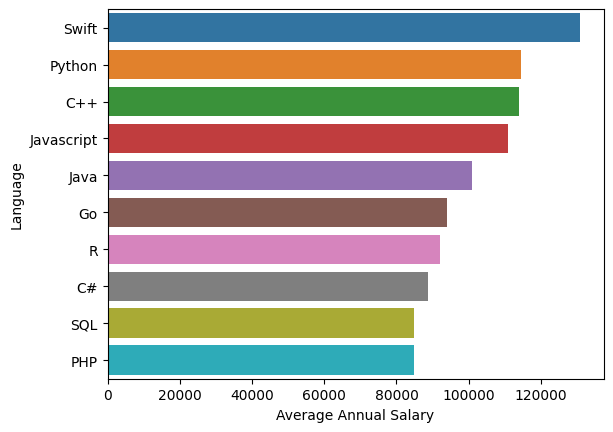

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

pop_lang = scraped_dataframe.copy()
pop_lang['Average Annual Salary'] = pop_lang['Average Annual Salary'].str.replace('[\$,]', "", regex=True).astype(int)
pop_lang = pop_lang.sort_values('Average Annual Salary', ascending=False)

sns.barplot(data=pop_lang, x='Average Annual Salary', y='Language')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
